In [2]:
import os
import math
import re
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [4]:
scaled_all_song_correlated_features_csv_path = '../correlated_csv/scaled_all_song_correlated_features_csv.csv'
scaled_bangladesh_song_correlated_features_csv_path = '../correlated_csv/scaled_bangladesh_song_correlated_features_csv.csv'
scaled_kolkata_song_correlated_features_csv_path = '../correlated_csv/scaled_kolkata_song_correlated_features_csv.csv'

In [5]:
corr_alls = pd.read_csv(scaled_all_song_correlated_features_csv_path)
corr_bd = pd.read_csv(scaled_bangladesh_song_correlated_features_csv_path)
corr_ind = pd.read_csv(scaled_kolkata_song_correlated_features_csv_path)

In [6]:
corr_fieldnames = [
                    'Country', 
                    'Song Name', 
                    'Popularity', 
                    'Time Signature', 
                    'Duration MS', 
                    'Tempo', 
                    'Valence', 
                    'Liveness', 
                    'Instrumentalness', 
                    'Acousticness', 'Speechiness', 
                    'Loudness', 
                    'Key', 
                    'Mode', 
                    'Energy', 
                    'Danceability', 
                    'Energy-Loudness', 
                    'Energy-Speechiness', 
                    'Energy-Valence', 
                    'Energy-Liveness', 
                    'Energy-Tempo', 
                    'Acousticness-Mode', 
                    'Acousticness-Instrumentalness', 
                    'Acousticness-Danceability', 
                    'Danceability-Valence', 
                    'Danceability-Key', 
                    'Danceability-Mode', 
                    'Danceability-Loudness', 
                    'Danceability-Time Signature', 
                    'Loudness-Speechiness', 
                    'Loudness-Valence', 
                    'Loudness-Liveness', 
                    'Loudness-Key', 
                    'Loudness-Mode', 
                    'Loudness-Tempo', 
                    'Loudness-Time Signature', 
                    'Loudness-Duration MS', 
                    'Valence-Speechiness', 
                    'Valence-Key', 
                    'Valence-Liveness', 
                    'Valence-Tempo', 
                    'Valence-Time Signature', 
                    'Speechiness-Liveness', 
                    'Speechiness-Tempo', 
                    'Liveness-Tempo', 
                    'Liveness-Key', 
                    'Instrumentalness-Mode', 
                    'Tempo-Duration MS', 
                    'Key-Mode', 
                    'Key-Duration MS', 
                    'Key-Time Signature', 
                    'Duration MS-Time Signature'
                   ]

In [7]:
corr_bd_popularity = corr_bd['Popularity']
corr_bd_time_signature = corr_bd['Time Signature']
corr_bd_duration_ms = corr_bd['Duration MS']
corr_bd_tempo = corr_bd['Tempo']
corr_bd_valencs = corr_bd['Valence']
corr_bd_livenss = corr_bd['Liveness']
corr_bd_instrumentalness = corr_bd['Instrumentalness']
corr_bd_acousticness = corr_bd['Acousticness']
corr_bd_speechiness = corr_bd['Speechiness']
corr_bd_loudness = corr_bd['Loudness']
corr_bd_key = corr_bd['Key']          
corr_bd_mode = corr_bd['Mode']
corr_bd_energy = corr_bd['Energy'] 
corr_bd_danceability = corr_bd['Danceability']

In [8]:
corr_ind_popularity = corr_ind['Popularity']
corr_ind_time_signature = corr_ind['Time Signature']
corr_ind_duration_ms = corr_ind['Duration MS']
corr_ind_tempo = corr_ind['Tempo']
corr_ind_valencs = corr_ind['Valence']
corr_ind_livenss = corr_ind['Liveness']
corr_ind_instrumentalness = corr_ind['Instrumentalness']
corr_ind_acousticness = corr_ind['Acousticness']
corr_ind_speechiness = corr_ind['Speechiness']
corr_ind_loudness = corr_ind['Loudness']
corr_ind_key = corr_ind['Key']          
corr_ind_mode = corr_ind['Mode']
corr_ind_energy = corr_ind['Energy'] 
corr_ind_danceability = corr_ind['Danceability'] 

In [9]:
def boxplot(data1,data2,y_label,x_label1,x_label2):
    plt.boxplot([data1, data2])
    
    mean1 = sum(data1) / len(data1)
    median1 = statistics.median(data1)
    mode1 = statistics.mode(data1)
    
    mean2 = sum(data2) / len(data2)
    median2 = statistics.median(data2)
    mode2 = statistics.mode(data2)
    
    print(x_label1,' : ',mean1,',',median1,',',mode1)
    print(x_label2,' : ',mean2,',',median2,',',mode2)
    # set the title and y-axis label
    plt.title('Comparison')
    plt.ylabel(y_label)

    # set x-axis labels
    plt.xticks([1, 2], [x_label1, x_label2])

    # display the plot
    plt.show()

Bangladesh  :  0.5818466602952108 , 0.5891472868217054 , 0.1802325581395347
Kolkata  :  0.47735175375137107 , 0.4804088586030665 , 0.3253833049403748


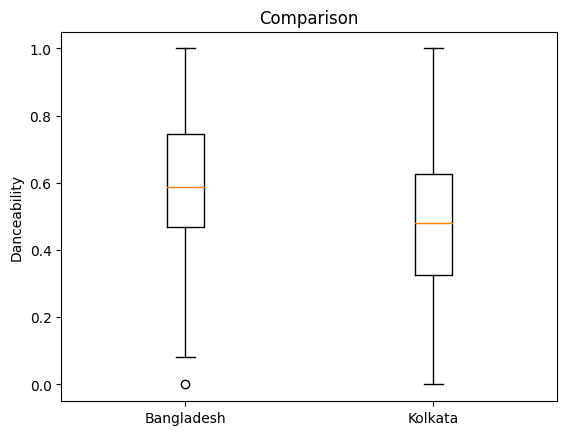

In [10]:
boxplot(corr_bd_danceability,corr_ind_danceability,'Danceability','Bangladesh','Kolkata')

Bangladesh  :  0.6040474116475859 , 0.6511479591836735 , 0.5076530612244898
Kolkata  :  0.5497167434017317 , 0.5435684647302904 , 0.9781005071461504


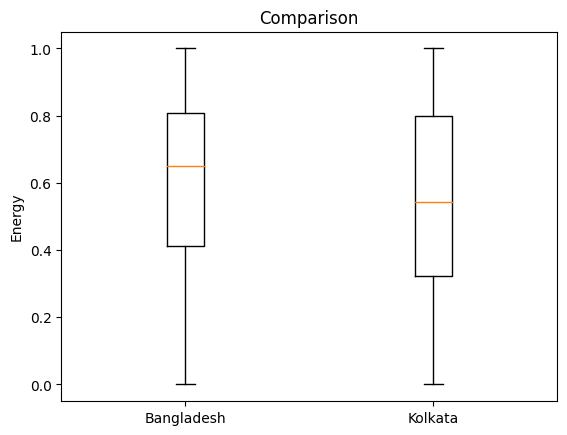

In [134]:
boxplot(corr_bd_energy,corr_ind_energy,'Energy','Bangladesh','Kolkata')

Bangladesh  :  0.6585365853658537 , 1.0 , 1.0
Kolkata  :  0.684931506849315 , 1.0 , 1.0


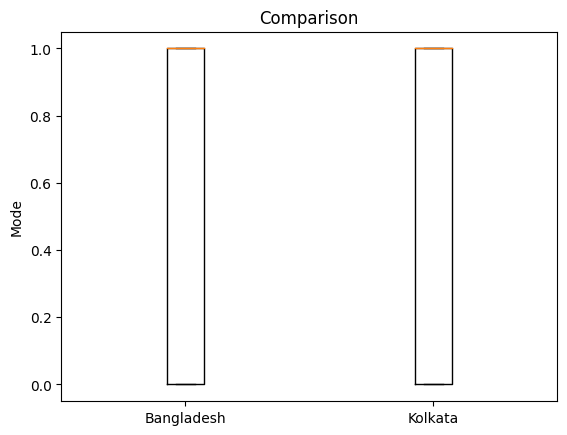

In [135]:
boxplot(corr_bd_mode,corr_ind_mode,'Mode','Bangladesh','Kolkata')

Bangladesh  :  0.4833702882483369 , 0.5454545454545454 , 0.0909090909090909
Kolkata  :  0.5105853051058531 , 0.4545454545454546 , 0.8181818181818182


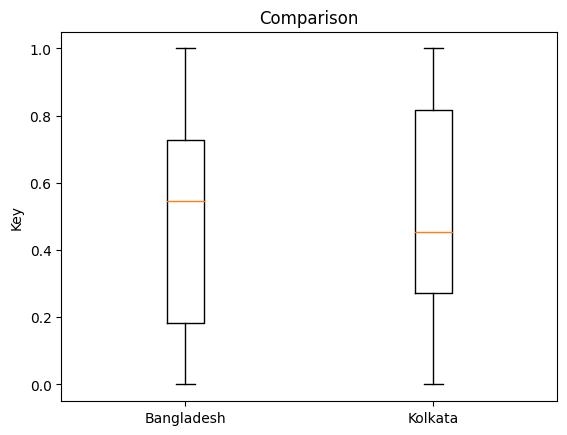

In [136]:
boxplot(corr_bd_key,corr_ind_key,'Key','Bangladesh','Kolkata')

Bangladesh  :  0.6818297302291205 , 0.727851430976431 , 0.5167824074074074
Kolkata  :  0.6105810036289778 , 0.6595695795358811 , 0.8643639427127212


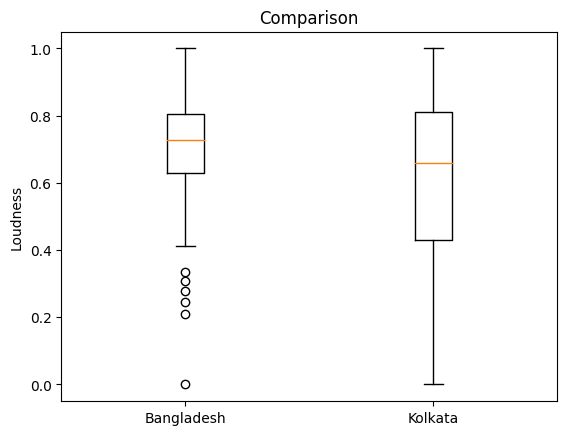

In [137]:
boxplot(corr_bd_loudness,corr_ind_loudness,'Loudness','Bangladesh','Kolkata')

Bangladesh  :  0.18611283470956036 , 0.10616438356164384 , 0.0185909980430528
Kolkata  :  0.13179535236330328 , 0.0814757878554958 , 0.1014604150653344


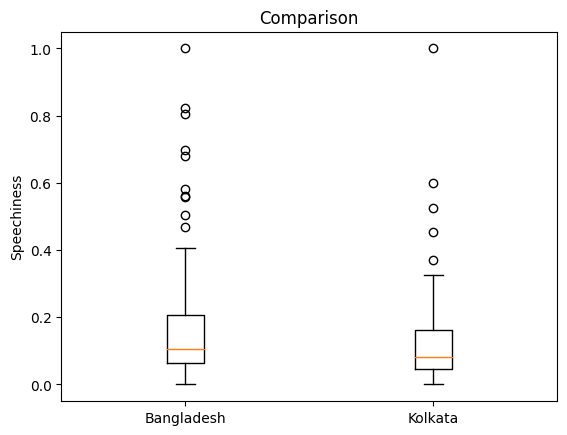

In [138]:
boxplot(corr_bd_speechiness,corr_ind_speechiness,'Speechiness','Bangladesh','Kolkata')

Bangladesh  :  0.27442500529483904 , 0.1097304970329133 , 0.0316546645907797
Kolkata  :  0.36902235087284674 , 0.2858517349995421 , 0.9300258184149408


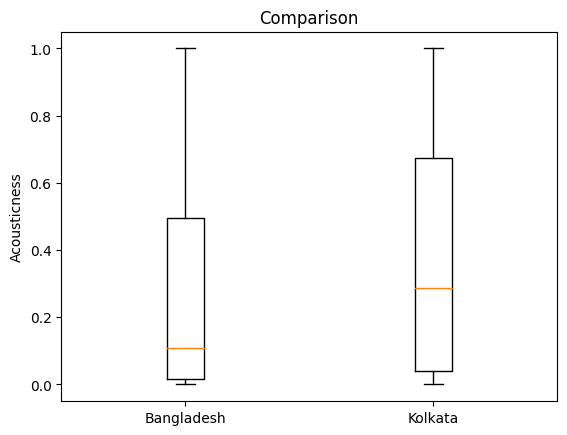

In [139]:
boxplot(corr_bd_acousticness,corr_ind_acousticness,'Acousticness','Bangladesh','Kolkata')

Bangladesh  :  0.02378854714987826 , 4.548022598868662e-05 , 0.0
Kolkata  :  0.057584563982626104 , 0.0005975609756097 , 0.0


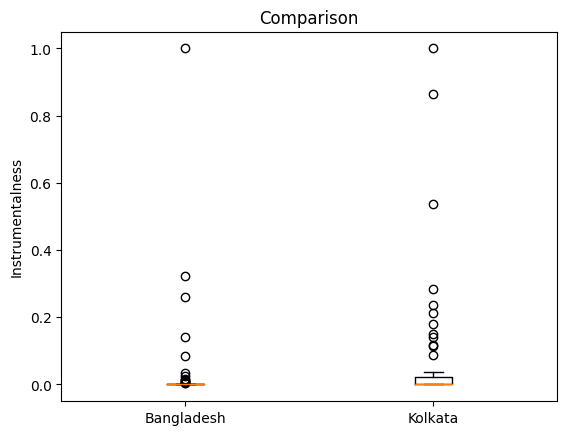

In [140]:
boxplot(corr_bd_instrumentalness,corr_ind_instrumentalness,'Instrumentalness','Bangladesh','Kolkata')

Bangladesh  :  0.1758876528213508 , 0.11322106771766391 , 0.0863489788606234
Kolkata  :  0.22767901294260096 , 0.1480827851756779 , 0.1143911439114391


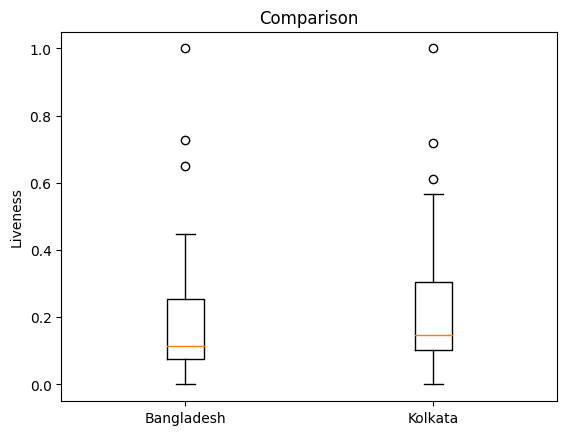

In [141]:
boxplot(corr_bd_livenss,corr_ind_livenss,'Liveness','Bangladesh','Kolkata')

Bangladesh  :  0.44205529615836586 , 0.4060667856232475 , 0.4583227122100434
Kolkata  :  0.4308704918403156 , 0.3930731170973062 , 0.4370533260032986


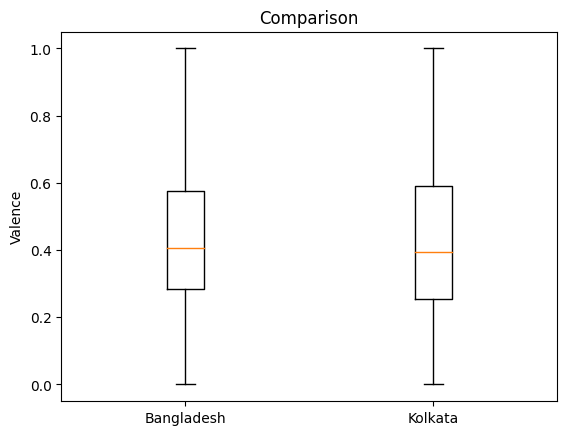

In [142]:
boxplot(corr_bd_valencs,corr_ind_valencs,'Valence','Bangladesh','Kolkata')

Bangladesh  :  0.4613441601246479 , 0.4796928746928746 , 0.6091564291564292
Kolkata  :  0.3993909051279496 , 0.456333830104322 , 0.5091873411063383


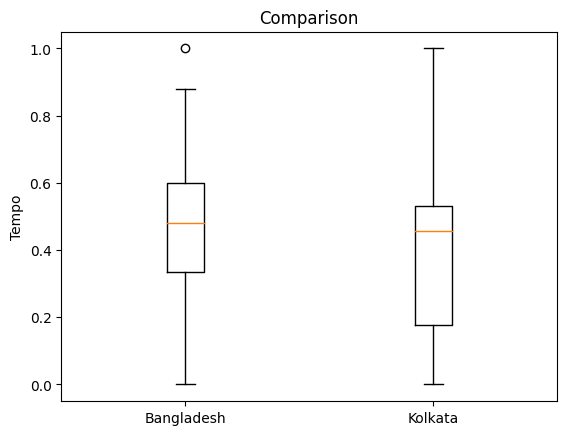

In [143]:
boxplot(corr_bd_tempo,corr_ind_tempo,'Tempo','Bangladesh','Kolkata')

Bangladesh  :  0.17953384520571006 , 0.163947902676703 , 0.2829109535559234
Kolkata  :  0.35308655661742877 , 0.3425908156913038 , 0.5617116084007732


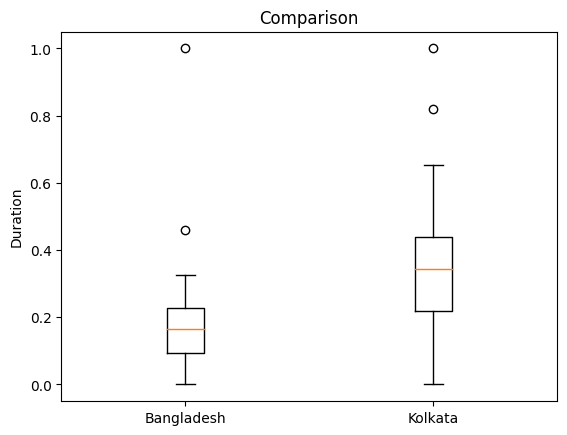

In [144]:
boxplot(corr_bd_duration_ms,corr_ind_duration_ms,'Duration','Bangladesh','Kolkata')

Bangladesh  :  0.7926829268292683 , 1.0 , 1.0
Kolkata  :  0.4589041095890411 , 0.5 , 0.5


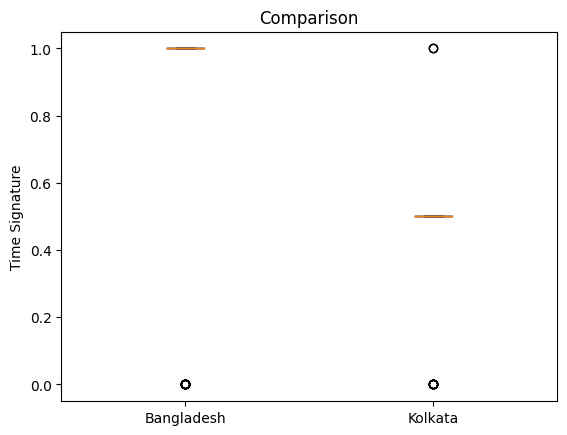

In [145]:
boxplot(corr_bd_time_signature,corr_ind_time_signature,'Time Signature','Bangladesh','Kolkata')

Bangladesh  :  0.4971796937953263 , 0.4411764705882352 , 0.4117647058823528
Kolkata  :  0.4573474470734744 , 0.4545454545454546 , 0.5454545454545454


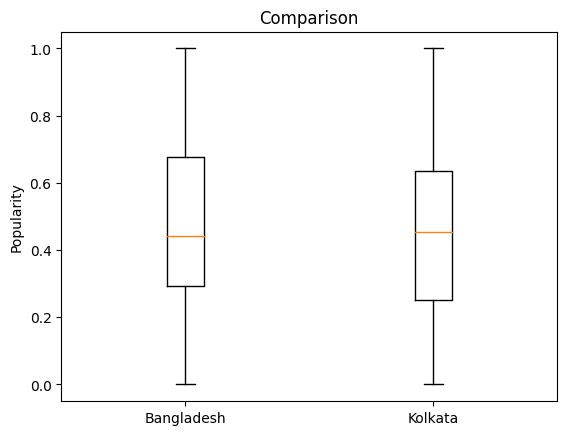

In [14]:
boxplot(corr_bd_popularity,corr_ind_popularity,'Popularity','Bangladesh','Kolkata')

In [13]:
corr_bd_acous_mode = corr_bd[corr_fieldnames[21]]
corr_bd_acous_instru = corr_bd[corr_fieldnames[22]]
corr_bd_dance_mode = corr_bd[corr_fieldnames[26]]
corr_bd_loud_mode = corr_bd[corr_fieldnames[33]]
corr_bd_instru_mode = corr_bd[corr_fieldnames[46]]

In [12]:
corr_ind_acous_mode = corr_ind[corr_fieldnames[21]]
corr_ind_acous_instru = corr_ind[corr_fieldnames[22]]
corr_ind_dance_mode = corr_ind[corr_fieldnames[26]]
corr_ind_loud_mode = corr_ind[corr_fieldnames[33]]
corr_ind_instru_mode = corr_ind[corr_fieldnames[46]]

Bangladesh  :  0.20630403414030155 , 0.0144563411790186 , 0.0
Kolkata  :  0.2559624127565808 , 0.0451611309885808 , 0.0


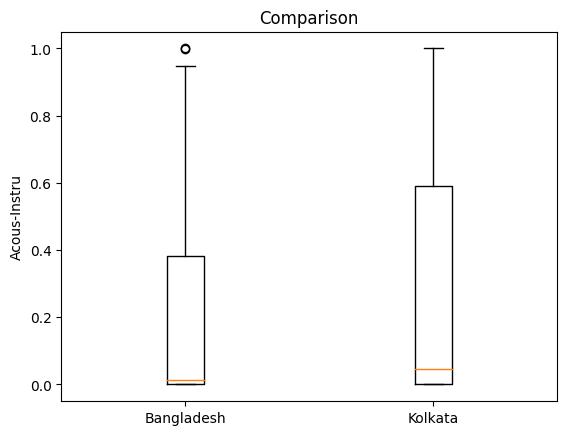

In [16]:
boxplot(corr_bd_acous_mode,corr_ind_acous_mode,'Acous-Instru','Bangladesh','Kolkata')

Bangladesh  :  26.904109589041095 , 25 , 24
Kolkata  :  20.123287671232877 , 20.0 , 24.0


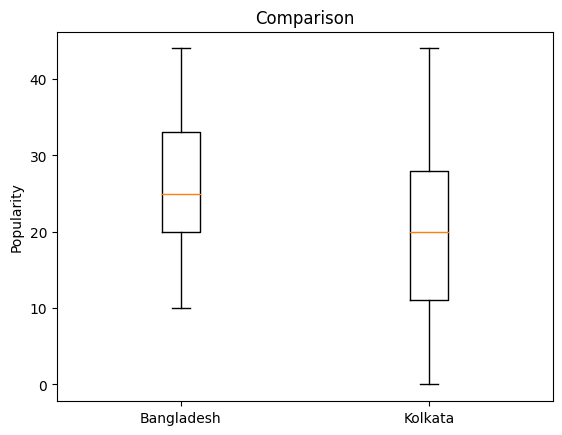

In [13]:
bd_non_scaled = pd.read_csv('../backup_csv/backup_bangladesh_song_features_csv.csv')
ind_non_scaled = pd.read_csv('../backup_csv/backup_kolkata_song_features_csv.csv')
boxplot(bd_non_scaled['Popularity'],ind_non_scaled['Popularity'],'Popularity','Bangladesh','Kolkata')

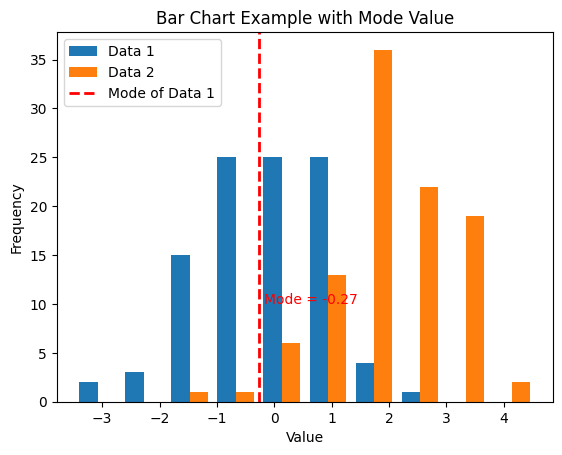

In [14]:
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=2, scale=1, size=100)

# calculate the mode of data1
mode_val = statistics.mode(data1)

# create a histogram of data1 and data2
plt.hist([data1, data2], bins=10, label=['Data 1', 'Data 2'])

# annotate the mode value on the chart
plt.axvline(mode_val, color='r', linestyle='--', linewidth=2, label='Mode of Data 1')
plt.annotate('Mode = {:.2f}'.format(mode_val), xy=(mode_val + 0.1, 10), color='r')

# set the title and x/y-axis labels
plt.title('Bar Chart Example with Mode Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# display the plot
plt.show()
